In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error


In [19]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [20]:
def create_model():
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation="relu")(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

model = create_model()
model.compile(optimizer=keras.optimizers.Adam(1e-3), 
              loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,162 (504.54 KB)

 Trainable params: 128,714 (502.79 KB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3),
    keras.callbacks.ModelCheckpoint("fashion_mnist_cnn.h5", save_best_only=True)
]

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=50,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7412 - loss: 0.7259

422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7413 - loss: 0.7254 - val_accuracy: 0.4907 - val_loss: 1.3109 - learning_rate: 0.0010
Epoch 2/50
419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8750 - loss: 0.3412 

422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8750 - loss: 0.3411 - val_accuracy: 0.8832 - val_loss: 0.3066 - learning_rate: 0.0010
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8980 - loss: 0.2790 - val_accuracy: 0.8755 - val_loss: 0.3373 - learning_rate: 0.0010
Epoch 4/50
418/422 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9089 - loss: 0.2494

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9089 - loss: 0.2494 - val_accuracy: 0.9008 - val_loss: 0.2640 - learning_rate: 0.0010
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9178 - loss: 0.2255 - val_accuracy: 0.8850 - val_loss: 0.3157 - learning_rate: 0.0010
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9243 - loss: 0.2071 - val_accuracy: 0.9033 - val_loss: 0.2760 - learning_rate: 0.0010
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9304 - loss: 0.1868 - val_accuracy: 0.8980 - val_loss: 0.2746 - learning_rate: 0.0010
Epoch 8/50
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9441 - loss: 0.1556

422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9441 - loss: 0.1556 - val_accuracy: 0.9228 - val_loss: 0.2174 - learning_rate: 1.0000e-04
Epoch 9/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9519 - loss: 0.1332 - val_accuracy: 0.9207 - val_loss: 0.2228 - learning_rate: 1.0000e-04
Epoch 10/50
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9540 - loss: 0.1289

422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9540 - loss: 0.1289 - val_accuracy: 0.9208 - val_loss: 0.2151 - learning_rate: 1.0000e-04
Epoch 11/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9577 - loss: 0.1203 - val_accuracy: 0.9178 - val_loss: 0.2201 - learning_rate: 1.0000e-04
Epoch 12/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9586 - loss: 0.1149 - val_accuracy: 0.9208 - val_loss: 0.2206 - learning_rate: 1.0000e-04
Epoch 13/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9589 - loss: 0.1140 - val_accuracy: 0.9210 - val_loss: 0.2206 - learning_rate: 1.0000e-04
Epoch 14/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9638 - loss: 0.1025 - val_accuracy: 0.9222 - val_loss: 0.2192 - learning_rate: 1.0000e-05
Epoch 15/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9627 - loss: 0.1055 - val_accuracy: 0.9217 - val_loss: 0.2203 - learning_rate: 1.0000e-05


In [22]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true_classes, y_pred_classes)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Accuracy: 0.9176
Precision: 0.9180
Recall: 0.9176


In [23]:
ssim_scores, psnr_scores, mse_scores = [], [], []
for i in range(1000):
    orig = x_test[i].squeeze()
    recon = orig * (1 + 0.1 * np.max(y_pred[i]))
    ssim_scores.append(ssim(orig, recon, data_range=1))
    psnr_scores.append(psnr(orig, recon, data_range=1))
    mse_scores.append(mean_squared_error(orig, recon))

print(f"SSIM: {np.mean(ssim_scores):.4f}")
print(f"PSNR: {np.mean(psnr_scores):.2f} dB")
print(f"MSE: {np.mean(mse_scores):.4f}")


SSIM: 0.9930
PSNR: 28.27 dB
MSE: 0.0019


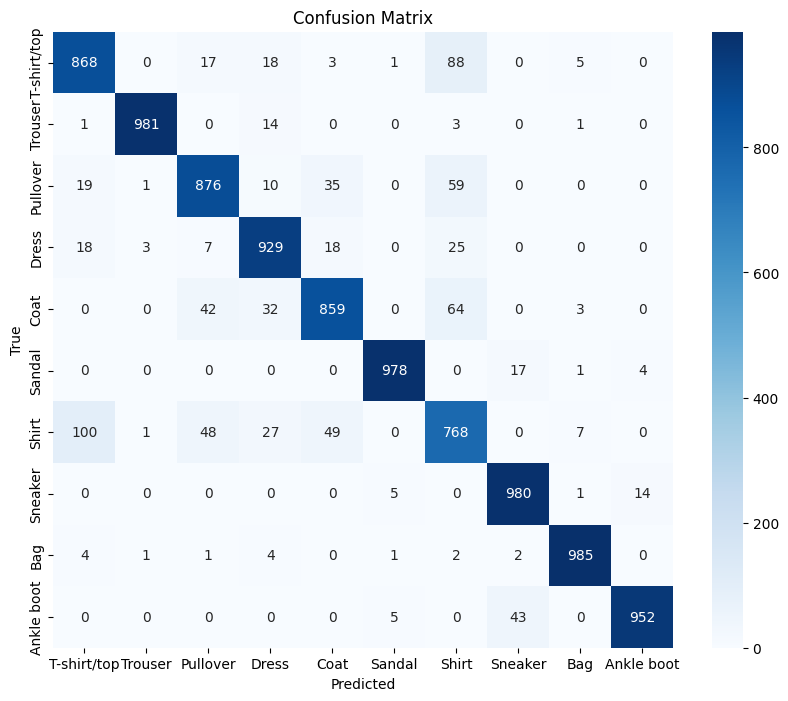

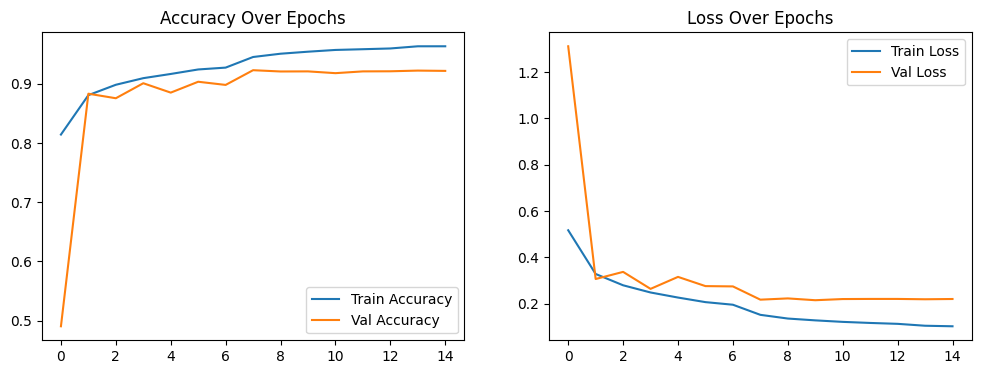

In [24]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()
